<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_03_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 03 – Entrega 06/09/2023
###Prof. Pedro Constantino


---


**Problema 1B**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_LU(A):
    n = A.shape[0]
    U = np.zeros((n, n))
    L = np.eye(n)  # coloca 1 na diagonal

    for k in range(n - 1):
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k] = m  # armazena entrada para L
            for j in range(k + 1, n):
                A[i, j] = A[i, j] - m * A[k, j]

    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j]

    for i in range(1, n):
        for j in range(i):
            L[i, j] = A[i, j]

    return L, U

def linear_LU_forward_back(L, U, b):
    n = len(b)

    # Realiza a substituição direta (forward substitution)
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i, j] * y[j]

    # Realiza a substituição reversa (back substitution)
    x = np.zeros(n)
    x[n-1] = y[n-1] / U[n-1, n-1]
    for i in range(n-2, -1, -1):
        S = y[i]
        for j in range(i+1, n):
            S = S - U[i, j] * x[j]
        x[i] = S / U[i, i]

    return x

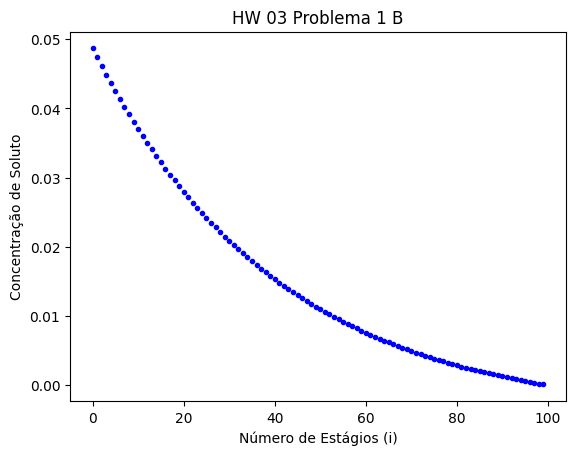

In [ ]:
# Dados do Problema
n = 100     # Número de Estágios
S = 1000.0  # Vazão do solvente (kg/h)
F = 2000.0  # Vazão da alimentação (kg/h)
yo = 0.0    # Concentração inicial de soluto no solvente
K = 2.05    # Constante de Equilíbrio
xin = 0.05  # Concentração inicial de soluto na alimentação

# Inicializar/Alocar variáveis
A = np.zeros((n, n))
b = np.zeros(n)
x = np.zeros(n)

# Montar o Sistema de Equações
for i in range(n):
    if i == 0:
        A[i, 0] = -(1 + S * K / F)
        A[i, 1] = S * K / F
        b[i] = -xin
    elif i == n - 1:
        A[i, n - 2] = 1
        A[i, n - 1] = -(1 + K * S / F)
        b[i] = -K * S / F * yo
    else:
        A[i, i - 1] = 1
        A[i, i] = -(1 + K * S / F)
        A[i, i + 1] = K * S / F

# Chamar a Função de Decomposição LU
# Eliminação (Forward) para obter L e U
L, U = linear_LU(A)

# Chamar a Função de Substituição (Forward) Ly = b
# Substituição (Backward) Ux = y
x = linear_LU_forward_back(L, U, b)

# Plotar o Gráfico
for i in range(n):
    plt.plot(i, x[i], '.-b')
plt.xlabel('Número de Estágios (n)')
plt.ylabel('Concentração de Soluto')
plt.title('HW 03 Problema 1 B')
plt.show()


---


**Problema 1C**

---

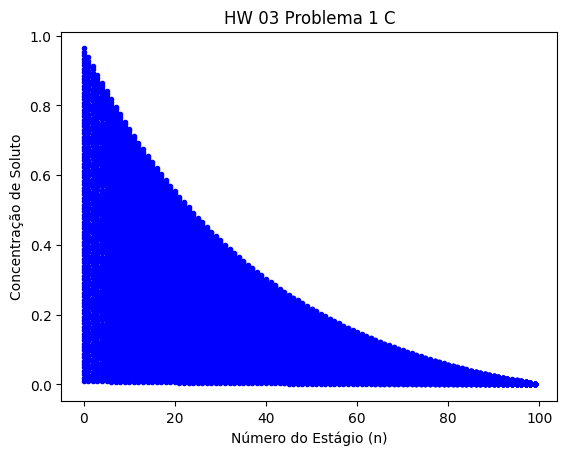

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do Problema
n = 100     # Número de Estágios
S = 1000.0  # Vazão do solvente (kg/h)
F = 2000.0  # Vazão da alimentação (kg/h)
yo = 0.0    # Concentração inicial de soluto no solvente
K = 2.05    # Constante de Equilíbrio

xin = np.arange(0.01,1,0.01) # Concentração inicial de soluto na alimentação

# Inicializar/Alocar variáveis
A = np.zeros((n, n))
b = np.zeros(n)
ntimes = len(xin)
x = np.zeros((n, ntimes)) # Definir x como uma matriz!


# Montar o Sistema de Equações
for i in range(n):
    for j in range(n):
        if i == 0:
            A[i, 0] = -(1 + S * K / F)
            A[i, 1] = S * K / F
        elif i == n - 1:
            A[i, n - 2] = 1
            A[i, n - 1] = -(1 + K * S / F)
            b[i] = -S / F * yo
        else:
            A[i, i - 1] = 1
            A[i, i] = -(1 + K * S / F)
            A[i, i + 1] = K * S / F

# Resolver por Decomposição LU
# Eliminação (Forward) para obter L e U
L, U = linear_LU(A)

# Fazer um loop para diferentes concetrações iniciais
for k in range(0,ntimes):
    b[0] = -xin[k]
    x[:,k] = linear_LU_forward_back(L, U, b)

# Plotar o Gráfico
for k in range(0,ntimes):
    for i in range(n):
        plt.plot(i, x[i, k], '.b')
plt.xlabel('Número do Estágio (n)')
plt.ylabel('Concentração de Soluto')
plt.title('HW 03 Problema 1 C')
plt.show()



---


**Problema 2**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_gauss_seidel(A, b, x):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de suposições iniciais
    n = len(b)
    tol = 1e-8  # tolerância para convergência
    count = 0
    count_max = 1e6  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:
        i = 0  # primeira entrada
        S = b[i]
        for j in range(1, n):
            S = S - A[i, j] * x[j]
        x[0] = S / A[i, i]

        for i in range(1, n - 1):  # entradas interiores
            S = b[i]
            for j in range(i):
                S = S - A[i, j] * x[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * x[j]
            x[i] = S / A[i, i]

        i = n - 1  # última entrada
        S = b[i]
        for j in range(n - 1):
            S = S - A[i, j] * x[j]
        x[n - 1] = S / A[i, i]

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        #print(f'k = {count} \t erro = {err:.4e}')

    return x

Modelo Quadrático: Cp = 0.000008T^2 + -0.000551T + 1.328027
Soma dos Erros Quadrados: Sr =2.3673109243699544e-05


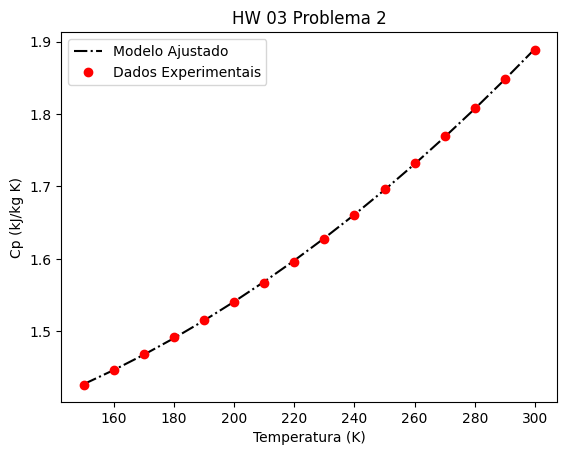

In [ ]:
# Dados Experimentais: Temperatura (K) e Cp (kJ/kg K)
T = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300])
Cp = np.array([1.4260, 1.4470, 1.4690, 1.4920, 1.5160, 1.5410, 1.5670, 1.5960, 1.6270, 1.6610, 1.6960, 1.7320, 1.7700, 1.8080, 1.8480, 1.8880])

# Sistema de Equações Mínimos Quadrados
ndata = len(T)
sx = np.sum(T)
sy = np.sum(Cp)
sxx = np.sum(T * T)
sxy = np.sum(T * Cp)
sx2y = np.sum(T * T * Cp)
sx3 = np.sum(T * T * T)
sx4 = np.sum(T * T * T * T)

A = np.array([[ndata, sx, sxx],
              [sx, sxx, sx3],
              [sxx, sx3, sx4]])

b = np.array([sy, sxy, sx2y])

# Resolver o sistema linear A * coef = b
coef = [0,0,0]  # Chute Inicial

a0, a1, a2 = linear_gauss_seidel(A,b,coef)

# Gerar a curva ajustada
Cp_calc = a0 + a1 * T + a2 * T**2
print("Modelo Quadrático: Cp = {:.6f}T^2 + {:.6f}T + {:.6f}".format(a2, a1, a0))

# Calcular Sr
Sr = np.sum((Cp - Cp_calc)**2)
print(f'Soma dos Erros Quadrados: Sr ={Sr}')

# Plotar o gráfico dos dados experimentais e modelo ajustado
plt.plot(T, Cp_calc, '-.k', label='Modelo Ajustado')
plt.plot(T, Cp, 'or', label='Dados Experimentais')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp (kJ/kg K)')
plt.title('HW 03 Problema 2')
plt.legend()
plt.show()
